# zip()函数
> zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的对象，这样做的好处是节约了不少的内存。

>>我们可以使用 list() 转换来输出列表。

>>>如果各个迭代器的元素个数不一致，则返回列表长度与最短的对象相同，利用 * 号操作符，可以将元组解压为列表。

In [1]:
a = ["a1", "a2", "a3"]
b = ["b1", "b2", "b3"]
c = ["c1", "c2", "c3", "c4", "c5"]

In [2]:
zipped_ab = zip(a, b)

In [3]:
zipped_ac = zip(a, c)

In [4]:
zipped_abc = zip(a, b, c)

In [20]:
print(zip(a, b))

In [5]:
list(zip(a,b))

[('a1', 'b1'), ('a2', 'b2'), ('a3', 'b3')]

In [17]:
print(*zip(a, b))

('a1', 'b1') ('a2', 'b2') ('a3', 'b3')


In [19]:
[zip for zip in [*zip(a,b)]]

[('a1', 'b1'), ('a2', 'b2'), ('a3', 'b3')]

In [11]:
print(zip(*zip(a, b)))

In [7]:
list(zip(*zip(a, b)))

[('a1', 'a2', 'a3'), ('b1', 'b2', 'b3')]

In [9]:
list(zip(zip(a, b)))

[(('a1', 'b1'),), (('a2', 'b2'),), (('a3', 'b3'),)]

***

# itertools 

![](./pic/itertools_001.png)

## 压缩

### ***reduce()***

In [19]:
from functools import reduce
origin = range(1, 6)
after_reduce = reduce(lambda a, b: a * b, origin)
print(after_reduce)

120


In [21]:
from functools import reduce
from operator import mul
origin = range(1, 6)
after_reduce = reduce(mul, origin)

print(after_reduce)

120


In [ ]:
from functools import reduce
def factorial(n):
    return reduce(lambda a, b: a*b, range(1, n+1))

print(factorial(5))

In [22]:
def factorial(n):
    return eval("*".join([str(i) for i in range(1, n+1)]))

print(factorial(5))

120


In [23]:
def factorial(n):
    return 1 if n==0 else n*factorial(n-1)

print(factorial(5))

120


## 无限Iterators

### count()

##### 1. count(0)

In [40]:
from itertools import count
counter = count(0)

In [41]:
for i in counter:
    print(i)
    if i > 9:
        break

0
1
2
3
4
5
6
7
8
9
10


---

##### 2. count(0,5)

### cycle()
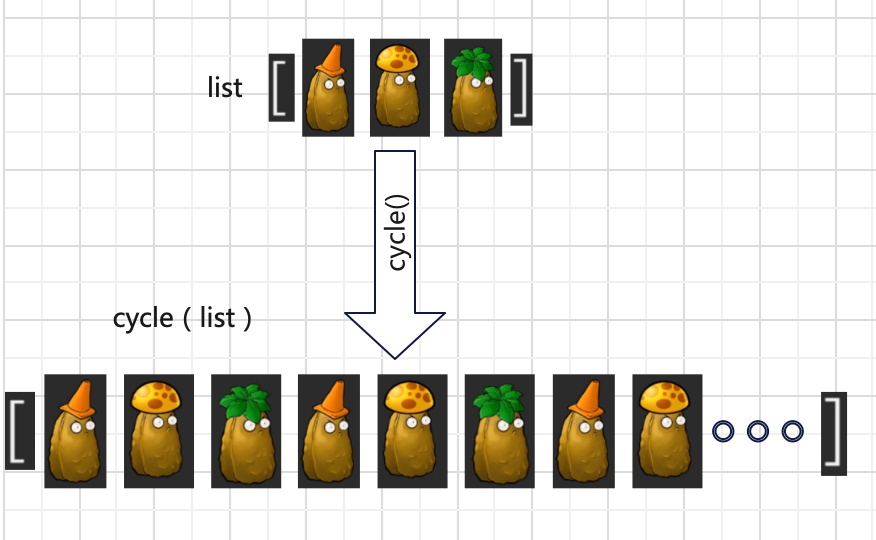

In [5]:
from itertools import cycle
name_list = ["Lantian", "Sunyang", "Lanxintian"]
cycler = cycle(name_list)

In [6]:
for i, person in enumerate(cycler):
    print(f"{i}:{person}")
    if i == 10:
        break
    

0:Lantian
1:Sunyang
2:Lanxintian
3:Lantian
4:Sunyang
5:Lanxintian
6:Lantian
7:Sunyang
8:Lanxintian
9:Lantian
10:Sunyang


### repeat() 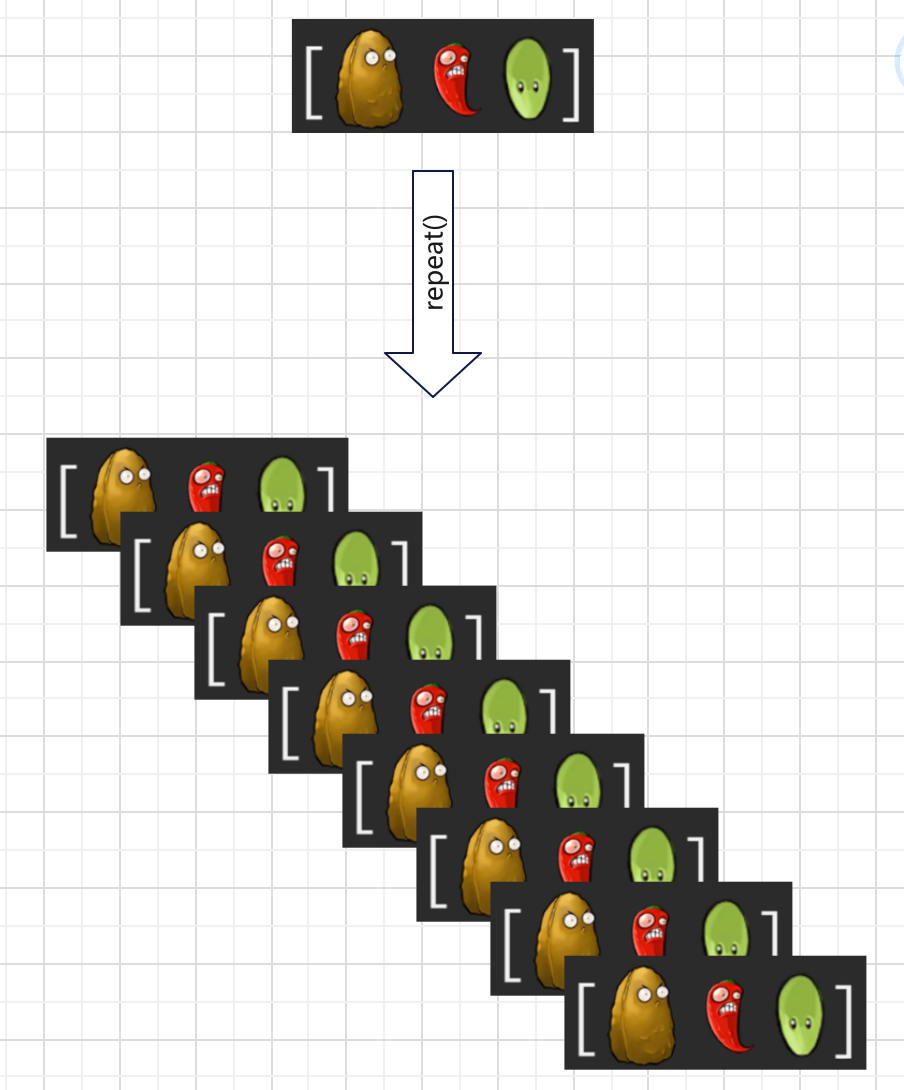

In [59]:
from itertools import repeat
str = "I love you"
repeater = repeat(str, 10)
print(repeater)

repeat('I love you', 10)


In [9]:
for str in repeater:
    print(str)

I love you
I love you
I love you
I love you
I love you
I love you
I love you
I love you
I love you
I love you


### tee() v.s. repeat()

In [60]:
from itertools import tee
origin = [1, 2, 3, "a", "b", "c"]
after_teed = tee(origin, 3)
print(list(after_teed))

[<itertools._tee object at 0x107fe9940>, <itertools._tee object at 0x107fe9e40>, <itertools._tee object at 0x107febc40>]


In [71]:
from itertools import tee
origin = [1, 2, 3, "a", "b", "c"]
after_teed = tee(origin, 3)
print(after_teed)

(<itertools._tee object at 0x107a7cfc0>, <itertools._tee object at 0x107fe5c00>, <itertools._tee object at 0x107fe66c0>)


In [64]:
from itertools import tee
origin = [1, 2, 3, "a", "b", "c"]
after_teed = tee(origin, 3)
for tee in after_teed:
    print(list(tee))

[1, 2, 3, 'a', 'b', 'c']
[1, 2, 3, 'a', 'b', 'c']
[1, 2, 3, 'a', 'b', 'c']


In [70]:
from itertools import repeat
repeater = repeat(origin, 3)
print(repeater)

repeat([1, 2, 3, 'a', 'b', 'c'], 3)


In [67]:
from itertools import repeat
repeater = repeat(origin, 3)
for repeat in repeater:
    print(repeat)

[1, 2, 3, 'a', 'b', 'c']
[1, 2, 3, 'a', 'b', 'c']
[1, 2, 3, 'a', 'b', 'c']


## other01

#### accumulate()

##### accumulate([])

In [23]:
from itertools import accumulate
numbers = range(1, 11)
accumulation = accumulate(numbers)
print(list(accumulation))

[1, 3, 6, 10, 15, 21, 28, 36, 45, 55]


##### accumulate([], operator.mul)

In [18]:
from itertools import accumulate
from operator import mul

In [24]:
numbers = range(1, 11)
accumulation_mul = accumulate(numbers, func=mul)
print(list(accumulation_mul))

[1, 2, 6, 24, 120, 720, 5040, 40320, 362880, 3628800]


#### chain()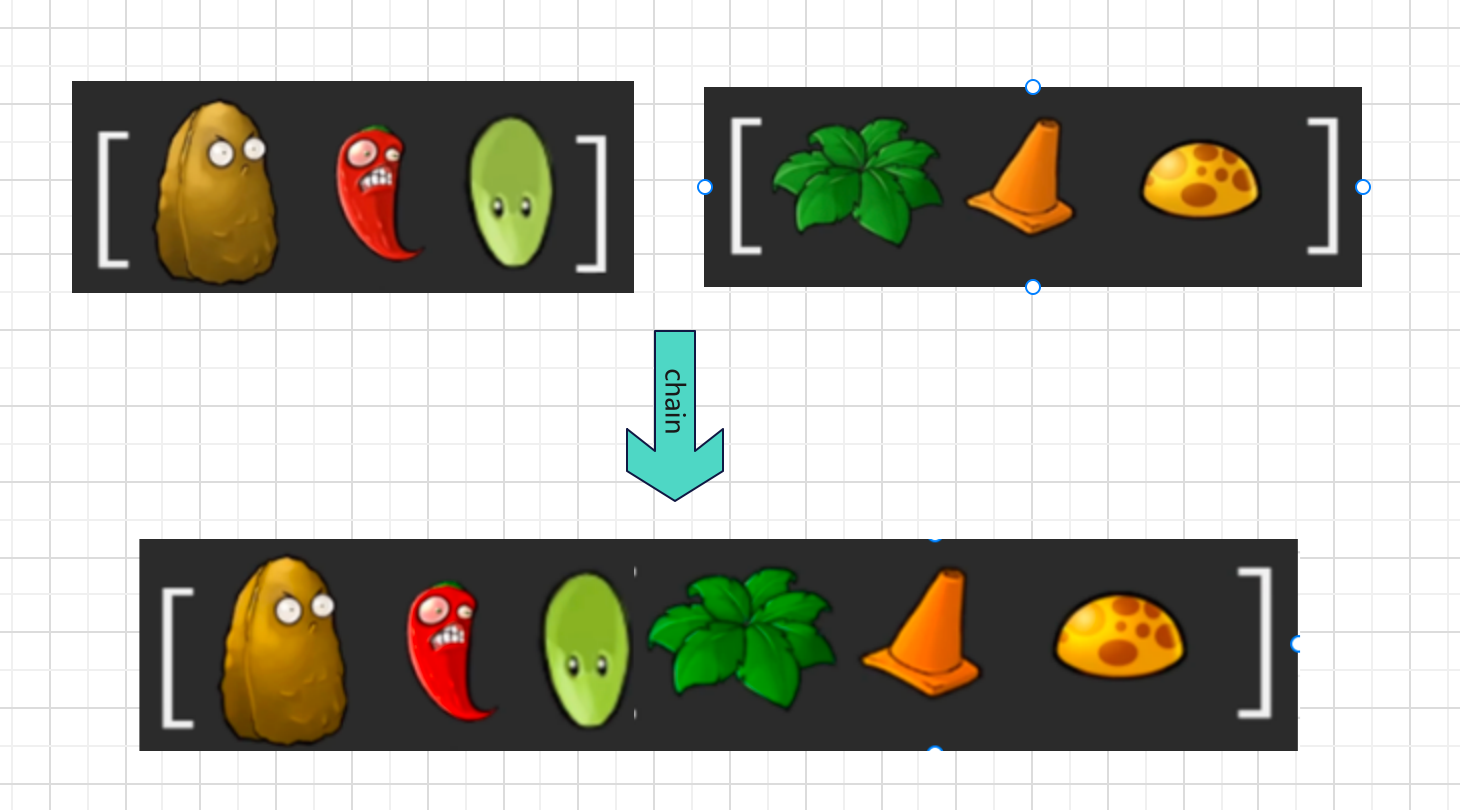

In [25]:
from itertools import chain
a = range(100, 106)
b = ["a", "b", "c", "d"]
c = ["lantian", "sunyang"]

In [26]:
long = chain(a, b, c, c, b, a)
print(list(long))

[100, 101, 102, 103, 104, 105, 'a', 'b', 'c', 'd', 'lantian', 'sunyang', 'lantian', 'sunyang', 'a', 'b', 'c', 'd', 100, 101, 102, 103, 104, 105]


## 过滤 
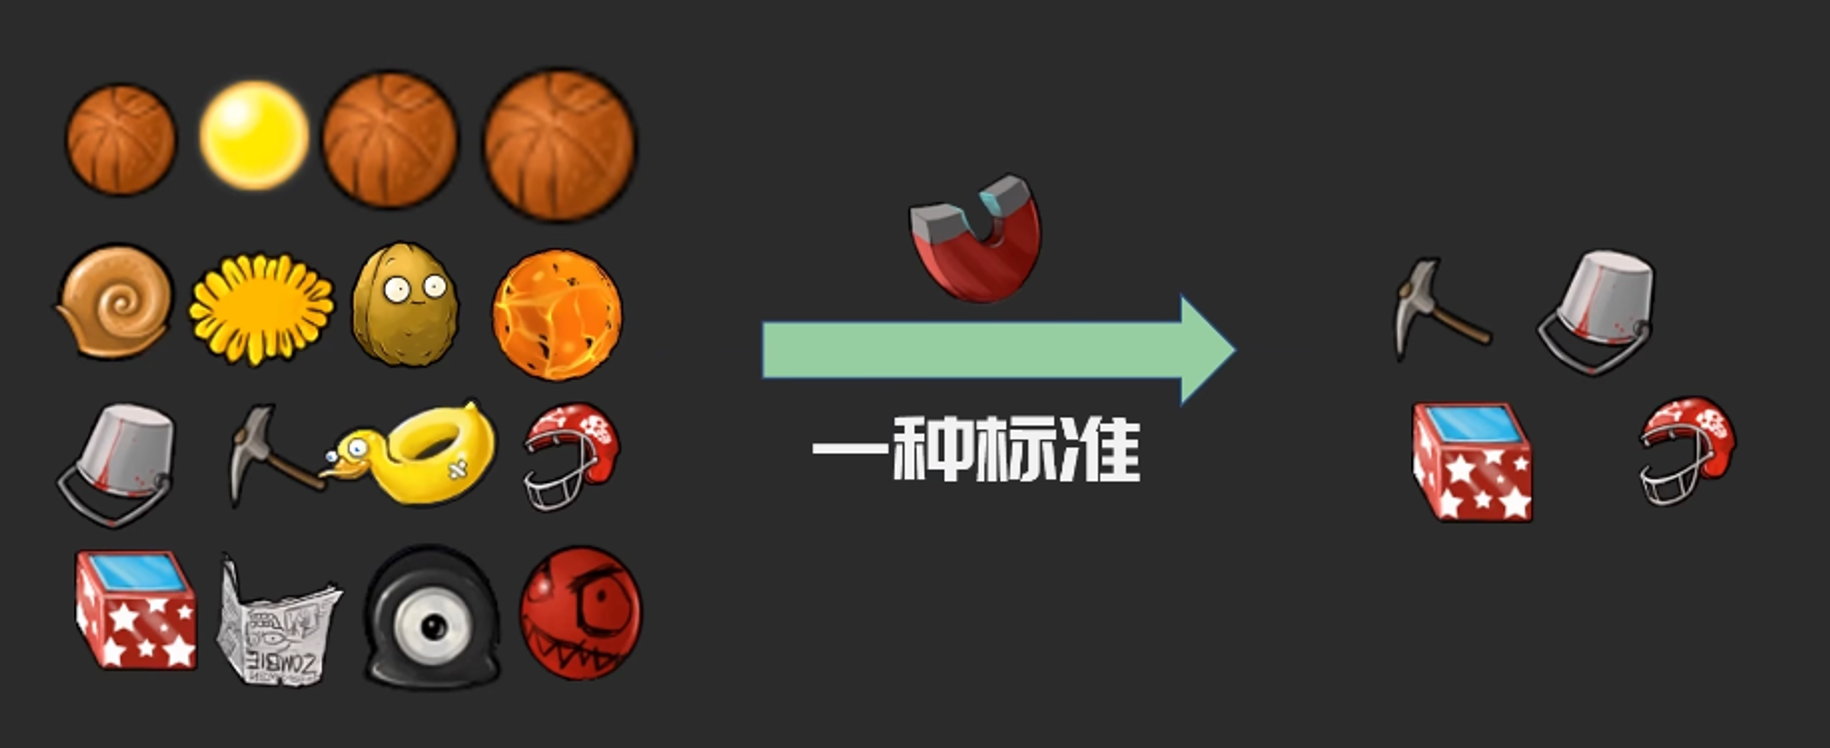

#### compress()

In [3]:
from itertools import compress
origin = ["a", "b", "c", "d"]
mask = [1, 0, 0, 1]

In [4]:
after_compress = compress(origin, mask)
print(list(after_compress))

['a', 'd']


#### filterfalse()

例子1:

In [23]:
from itertools import filterfalse
origin = ["a", "b", "c", "d"]
after_filterfalse = filterfalse(lambda x: x == "b" or x == "c", origin)
print(list(after_filterfalse))

['a', 'd']


例子2:

In [24]:
from itertools import filterfalse
origin = range(100)
after_filterfalse = filterfalse(lambda x: x % 10, origin)
print(list(after_filterfalse))

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]


例子3

In [42]:
from itertools import filterfalse
origin = [0, 1, False, True]
after_filterfalse = filterfalse(None, origin)
print(list(after_filterfalse))

[0, False]


In [46]:
from itertools import filterfalse
origin = [0, 1, False, True]
after_filterfalse = filterfalse(lambda x: 0, origin)
print(list(after_filterfalse))

[0, 1, False, True]


#### dropwhile()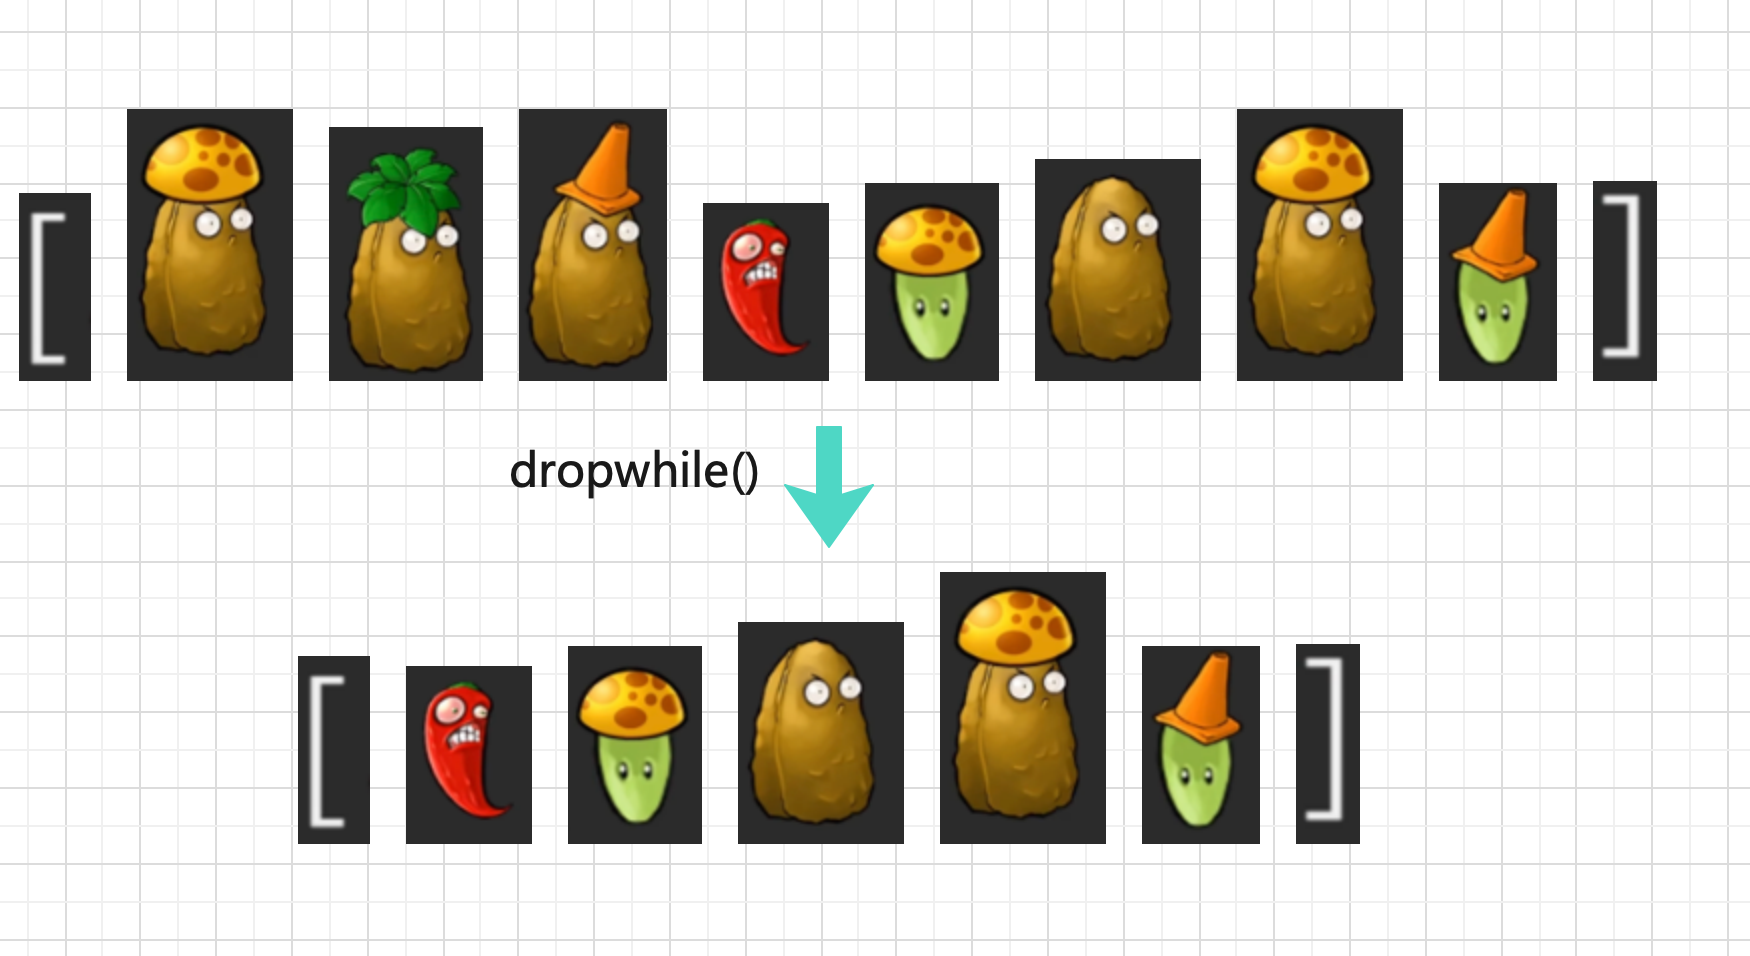

In [40]:
from itertools import dropwhile
from itertools import chain
l1 = range(1, 11)
l2 = [1, 2, 3, 3, 4]
origin = chain(l1, l2)

In [41]:
after_dropwhile = dropwhile(lambda x: x<4, origin)
print(list(after_dropwhile))
print(list(after_dropwhile)) # 第二次打印已经没有了，生成器

[4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 3, 4]
[]


#### takewhile()

In [56]:
from itertools import takewhile
l1 = range(1, 11)
l2 = [1, 2, 3, 3, 4]
origin = chain(l1, l2)

In [57]:
after_takewhile = takewhile(lambda x: x<4, origin)
print(list(after_takewhile))

[1, 2, 3]


## 分组

#### groupby()

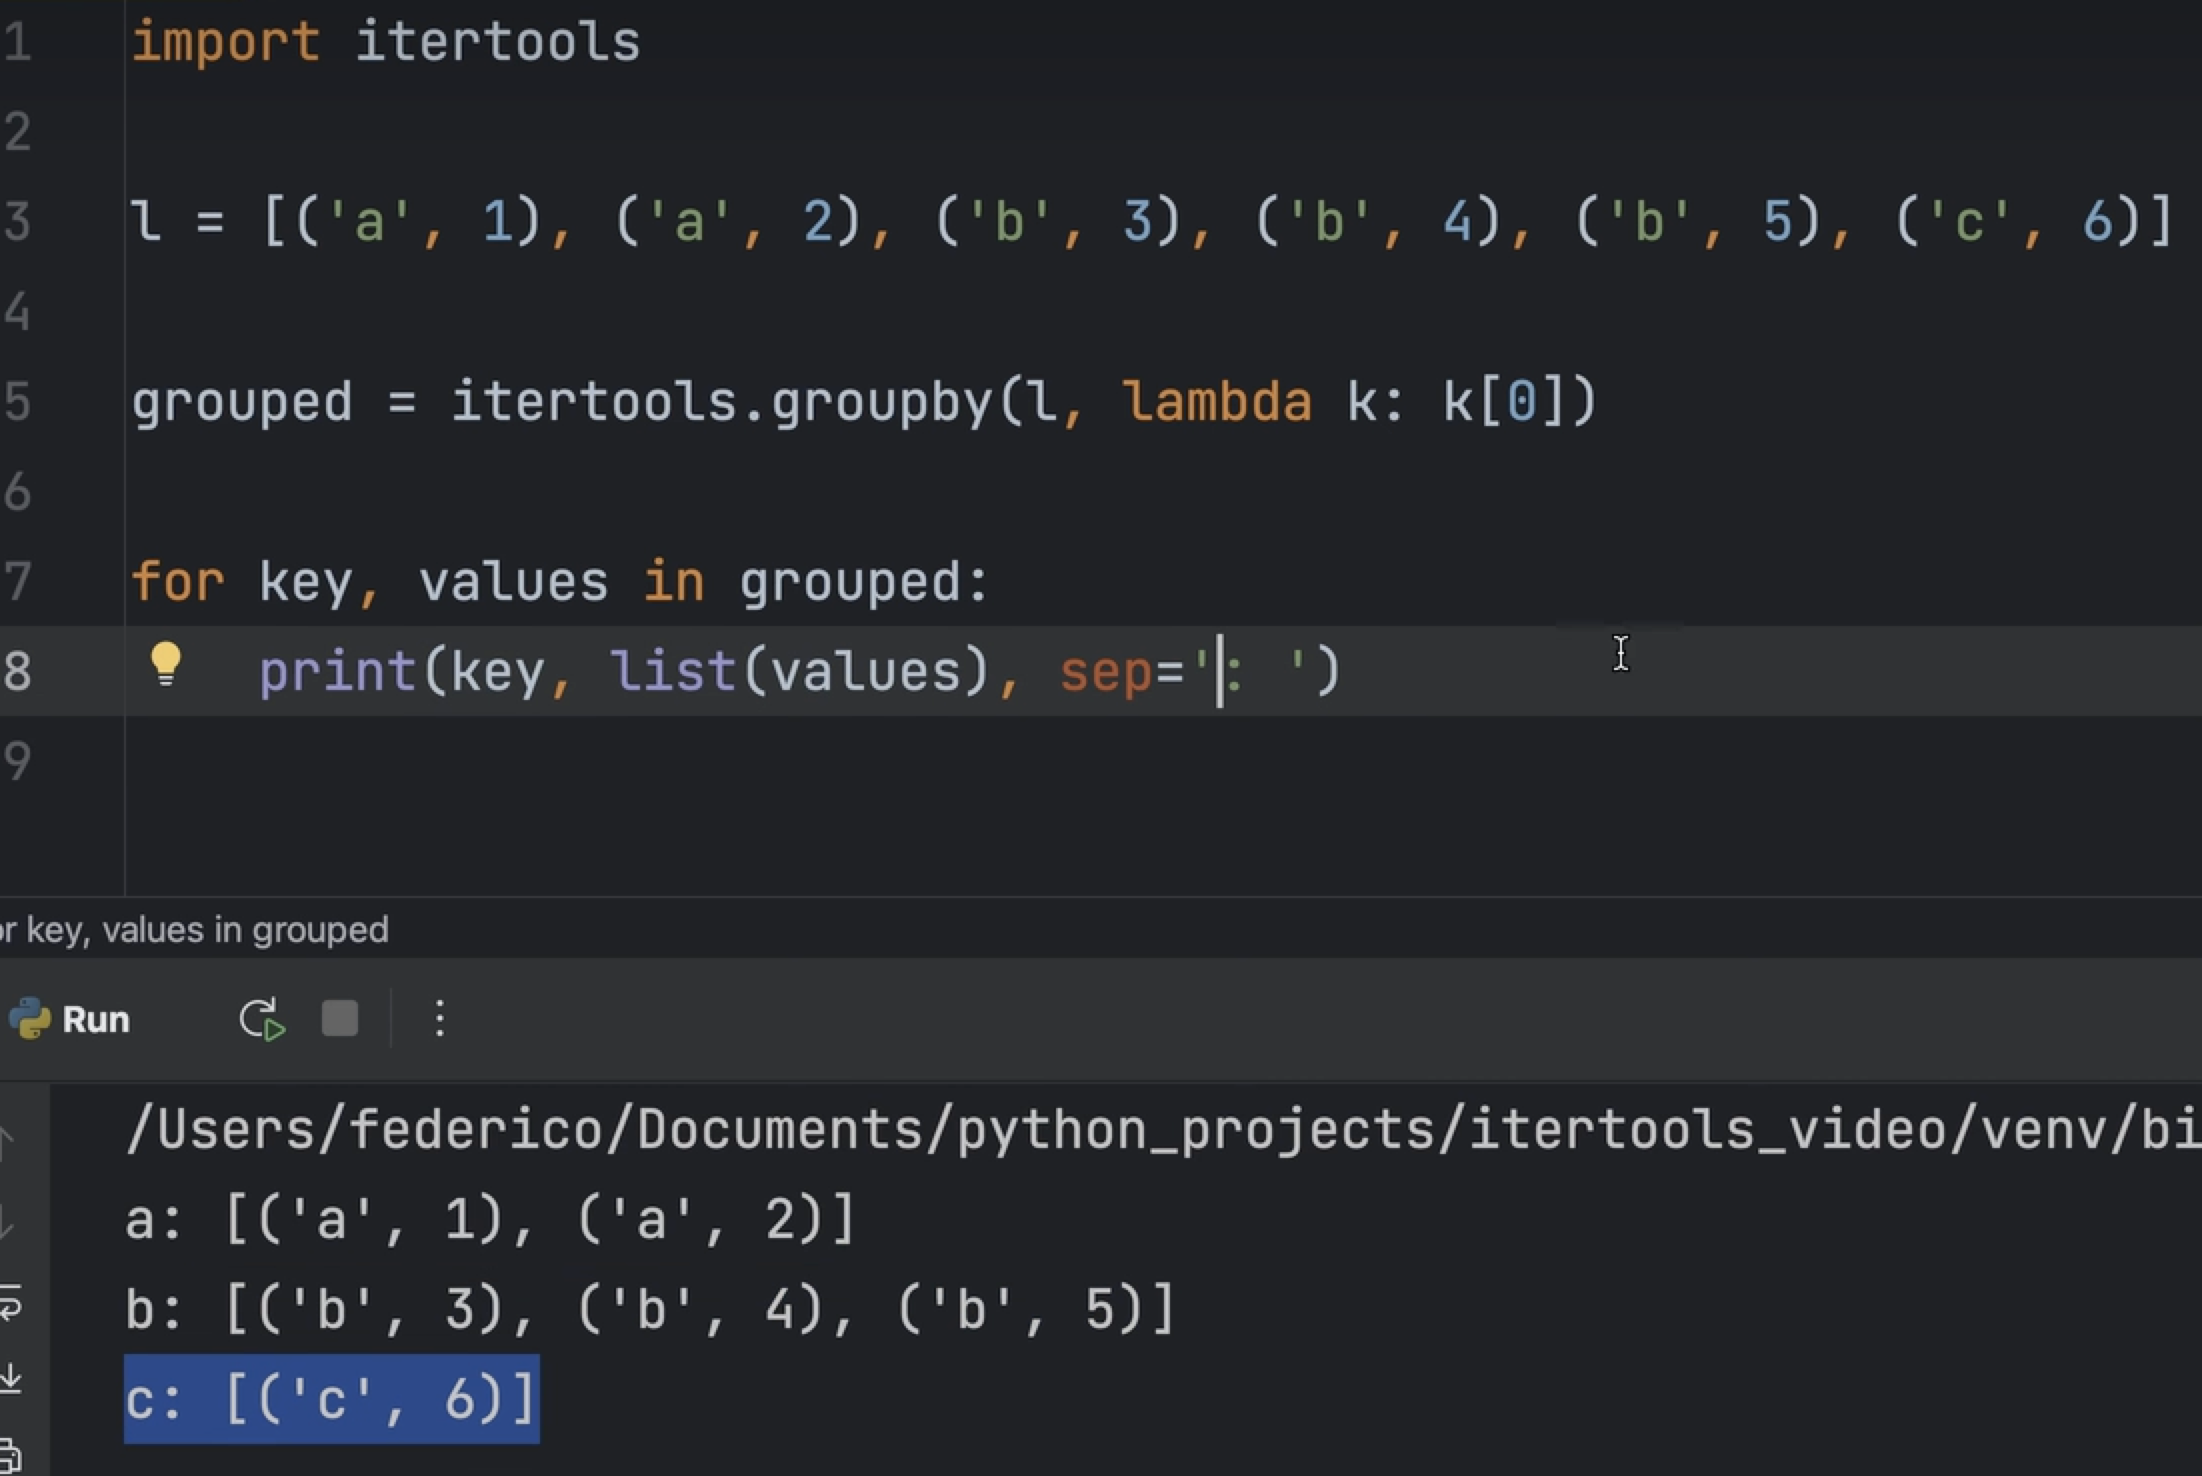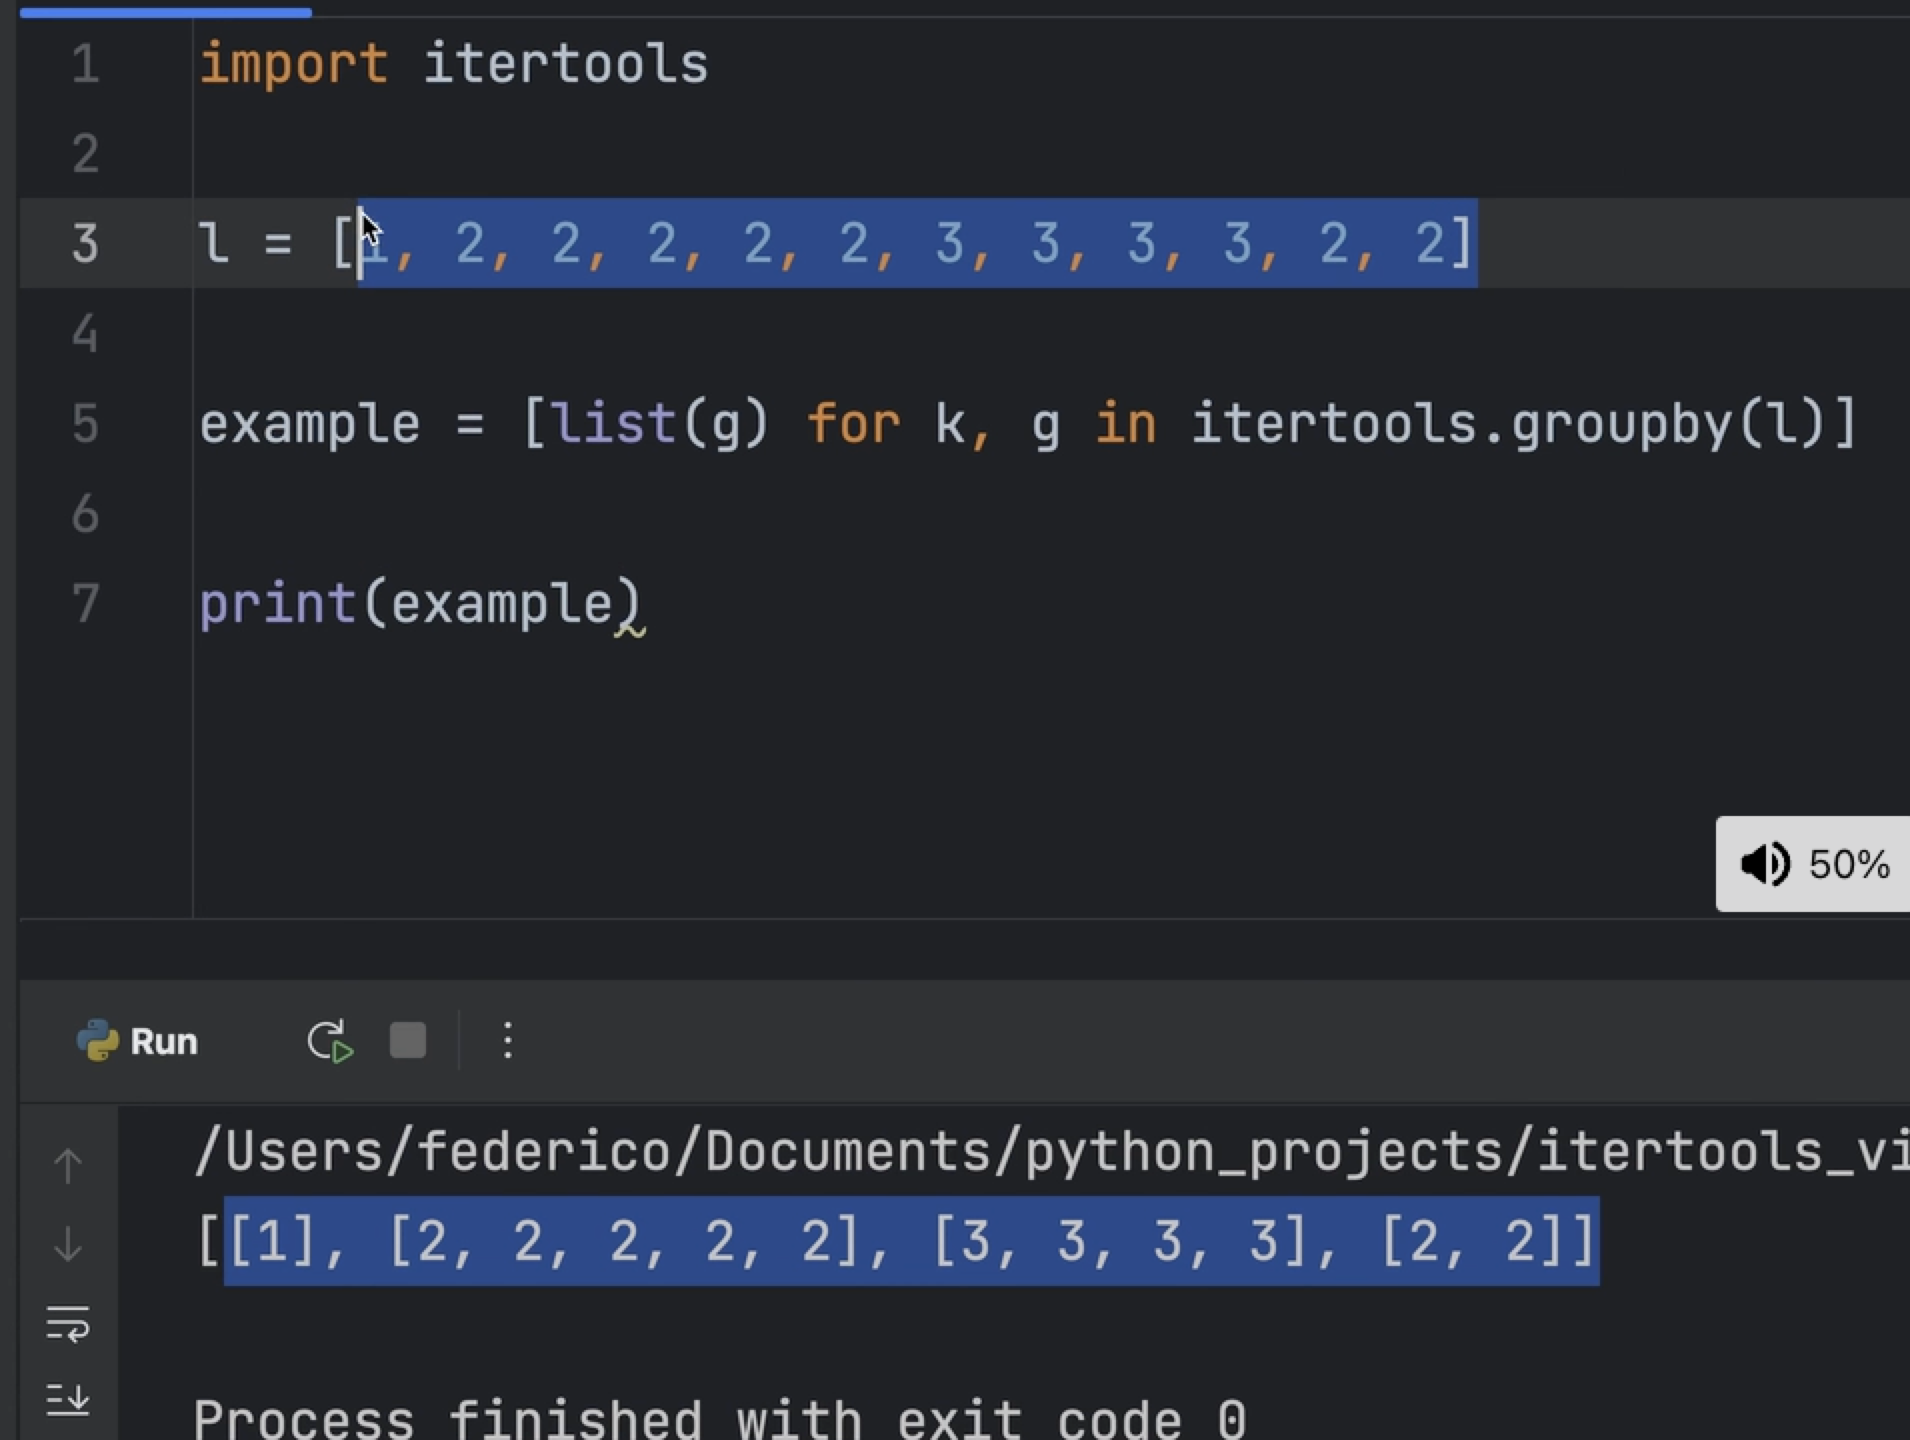

#### islice()

#### ***pairwise()***
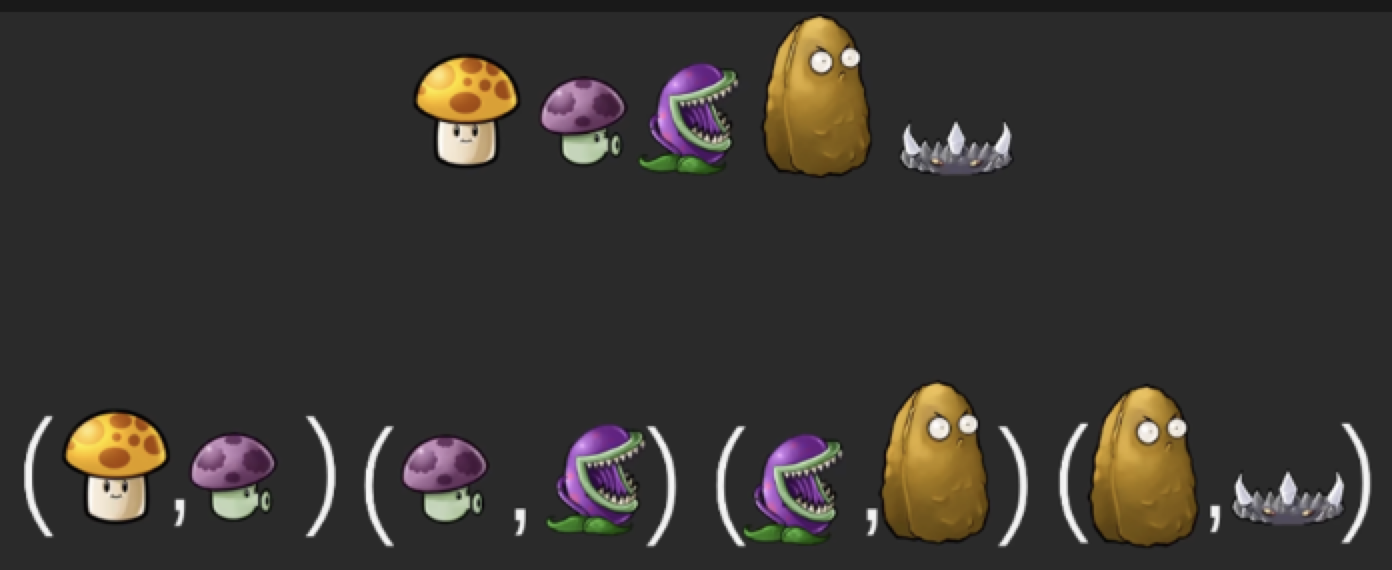

In [49]:
from itertools import pairwise
origin = "abcde"
paired = pairwise(origin)
print(list(paired))

[('a', 'b'), ('b', 'c'), ('c', 'd'), ('d', 'e')]


In [51]:
origin = ["a1", "a2", "a3", "a4", "a5"]
paired = pairwise(origin)
print(list(paired))

[('a1', 'a2'), ('a2', 'a3'), ('a3', 'a4'), ('a4', 'a5')]


#### **starmap()**

In [52]:
from itertools import starmap
origin = [(1, 2, 3, 4), (5, 6), (7, 8)]

def add_x(*args):
    temp = []
    for arg in args:
        temp.append(f"{arg}X")
    return temp

after_starmap = starmap(add_x, origin)
print(list(after_starmap))

[['1X', '2X', '3X', '4X'], ['5X', '6X'], ['7X', '8X']]


In [54]:
from itertools import starmap
from operator import pow
origin = [(2, 2), (2, 3), (2, 4)]
after_starmap = starmap(pow, origin)
print(list(after_starmap))

[4, 8, 16]


#### zip() v.s. **zip_longest()**